# Multivariable_Regression

In [7]:
library(ggplot2)

## Innovation in insurance Industry
 - 보험업계의 혁신에 대한 연구
 - 혁신을 받아들이는데 걸리는 시간이 회사 규모와 유형에 따라 달라지는가?
 - Y: 혁신을 받아들이는데까지 걸리는기간을 월 단위로측정
 - X1: 회사의자산규모
 - X2: 회사 유형 (stock, mutual)

In [5]:
insurance <- read.csv("insurance.csv")
head(insuracne,3)

,time,size,type
1,17,151,Mutual
2,26,92,Mutual
3,21,175,Mutual


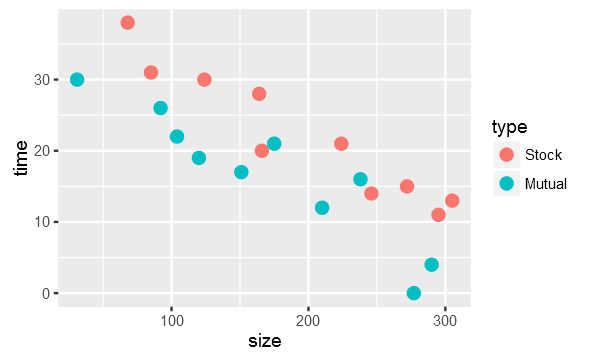

In [13]:
options(repr.plot.width=5,repr.plot.height=3)
ggplot(insuracne,aes(x=size,y=time,color=type)) + geom_point(size=3)

 - 음의 상관관계  
 <img src="photo/1.PNG" width=600>

In [14]:
cor(insuracne$time,insuracne$size)

[1] -0.8407769

<img src="photo/2.PNG">

In [15]:
model1 <- lm(time~size+type,insuracne)
summary(model1)


Call:
lm(formula = time ~ size + type, data = insuracne)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6915 -1.7036 -0.4385  1.9210  6.3406 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.929538   2.010101  20.859 1.50e-13 ***
size        -0.101742   0.008891 -11.443 2.07e-09 ***
typeMutual  -8.055469   1.459106  -5.521 3.74e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.221 on 17 degrees of freedom
Multiple R-squared:  0.8951,	Adjusted R-squared:  0.8827 
F-statistic:  72.5 on 2 and 17 DF,  p-value: 4.765e-09


 - Stock = 33.87+8.055 -0.101$ \beta_1$
 - Mutual = 33.87 - 0.101$\beta_1$

 - Machine learning 에서 배운 Matirx의 합으로 수식을 최소화하는 방법과 같다. 
  - (Intercept) = 1 
  - Matrix 곱

In [20]:
head(model1$fitted.values,3)

1        2        3 
18.51101 24.51379 16.06920

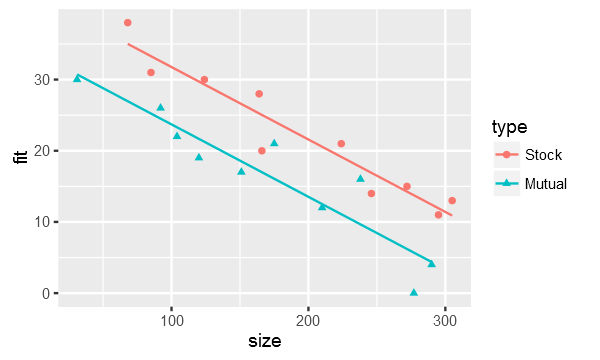

In [18]:
insuracne$fit = model1$fitted.values
gg <- ggplot(insuracne,aes(y=fit,x=size,group=type,color=type)) + geom_line() 
gg + geom_point(aes(y=time,x=size,shape=type))

In [16]:
model.matrix(time~size+type,insuracne)

,(Intercept),size,typeMutual
1,1,151,1
2,1,92,1
3,1,175,1
4,1,31,1
5,1,104,1
6,1,277,1
7,1,210,1
8,1,120,1
9,1,290,1
10,1,238,1


<img src="photo/3.PNG">

# Reference Level 조정. 
### type(0 if stock, 1 if mutual)

In [21]:
insuracne$type = relevel(insuracne$type,ref="Stock")
model2 = lm(time ~ ., insuracne)
summary(model2)


Call:
lm(formula = time ~ ., data = insuracne)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.6915 -1.7036 -0.4385  1.9210  6.3406 

Coefficients: (1 not defined because of singularities)
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.929538   2.010101  20.859 1.50e-13 ***
size        -0.101742   0.008891 -11.443 2.07e-09 ***
typeMutual  -8.055469   1.459106  -5.521 3.74e-05 ***
fit                NA         NA      NA       NA    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.221 on 17 degrees of freedom
Multiple R-squared:  0.8951,	Adjusted R-squared:  0.8827 
F-statistic:  72.5 on 2 and 17 DF,  p-value: 4.765e-09


In [23]:
model.matrix(time~size+type,insuracne)

,(Intercept),size,typeMutual
1,1,151,1
2,1,92,1
3,1,175,1
4,1,31,1
5,1,104,1
6,1,277,1
7,1,210,1
8,1,120,1
9,1,290,1
10,1,238,1


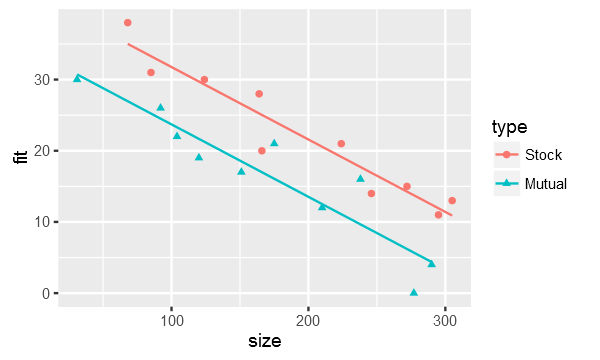

In [24]:
insuracne$fit = model2$fitted.values
gg <- ggplot(insuracne,aes(y=fit,x=size,group=type,color=type)) + geom_line() 
gg + geom_point(aes(y=time,x=size,shape=type))

<img src="photo/4.PNG">

# Making dummy Variable

In [28]:
insuracne <- insuracne[,-c(4)] # if there is fit_value, delete fit_value

In [29]:
contr.sum(insuracne$type)

Mutual,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mutual,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mutual,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mutual,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mutual,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Mutual,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
Mutual,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
Mutual,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
Mutual,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
Mutual,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
Stock,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [30]:
model3 = lm(time~.,insuracne,contrasts = list(type=contr.sum))
model.matrix(time~.,insuracne,contrasts = list(type=contr.sum))

,(Intercept),size,type1
1,1,151,-1
2,1,92,-1
3,1,175,-1
4,1,31,-1
5,1,104,-1
6,1,277,-1
7,1,210,-1
8,1,120,-1
9,1,290,-1
10,1,238,-1


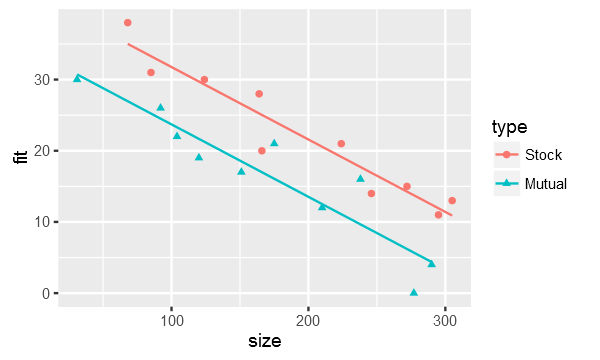

In [31]:
insuracne$fit = model3$fitted.values
gg <- ggplot(insuracne,aes(y=fit,x=size,group=type,color=type)) + geom_line() 
gg + geom_point(aes(y=time,x=size,shape=type))

# 두 개 이상의 Level을 가진 범주형 변수

## Country demographic information 
### 미국의 가장 인구가 많은 440개 county 의 자료


In [16]:
cdi <- read.csv("CDI.csv")
# y = crime
# x1 = pop
# region 지역 : (1=NE,2=NC,3=S,4=W)
head(cdi,3)

,id,county,state,area,pop,pop_18_34,pop_65,physician,hospital,crime,highschool,bachelor,poverty,unemployment,income,total_income,region
1,1,Los_Angeles,CA,4060,8863164,32.1,9.7,23677,27700,688936,70,22.3,11.6,8,20786,184230,4
2,2,Cook,IL,946,5105067,29.2,12.4,15153,21550,436936,73.4,22.8,11.1,7.2,21729,110928,2
3,3,Harris,TX,1729,2818199,31.3,7.1,7553,12449,253526,74.9,25.4,12.5,5.7,19517,55003,3


## 범죄발생 건수가 인구, 실업률과 지역에 따라 어떻게 달라지는가?
$$ y = \beta_0 + \beta_1X_1 + \beta_2X_{2,2} + \beta_3X_{2,3} + \beta_4X_{2,4} + \epsilon $$

- $X_{2,2} = 1 \ if \ region =2, \ 0 \ if \ otherwise$
- $X_{2,3} = 1 \ if \ region =3, \ 0 \ if \ otherwise$
- $X_{2,4} = 1 \ if \ region =3, \ 0 \ if \ otherwise$

<img src="photo/5.PNG">

In [17]:
cdi$region <- as.factor(cdi$region)
model_cdi <- lm(crime ~ pop + region, data=cdi)
summary(model_cdi)


Call:
lm(formula = crime ~ pop + region, data = cdi)

Residuals:
   Min     1Q Median     3Q    Max 
-73819  -4087    202   3971 493435 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.109e+04  2.773e+03  -3.999 7.48e-05 ***
pop          8.633e-02  2.148e-03  40.195  < 2e-16 ***
region2      2.982e+03  3.690e+03   0.808   0.4195    
region3      9.674e+03  3.421e+03   2.828   0.0049 ** 
region4      1.116e+03  4.055e+03   0.275   0.7833    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 26780 on 435 degrees of freedom
Multiple R-squared:  0.7904,	Adjusted R-squared:  0.7885 
F-statistic: 410.2 on 4 and 435 DF,  p-value: < 2.2e-16


In [18]:
t(model.matrix(crime ~ pop + region, data=cdi))

,1,2,3,4,5,6,7,8,9,10,...,431,432,433,434,435,436,437,438,439,440
(Intercept),1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
pop,8863164,5105067,2818199,2498016,2410556,2300664,2122101,2111687,1937094,1852810,...,102583,102525,101469,101461,101154,101115,100900,100498,100374,100043
region2,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
region3,0,0,1,0,0,0,0,0,1,1,...,0,0,0,0,1,1,1,1,0,1
region4,1,0,0,1,1,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Anova 
 - df = 3 -> $\beta_1,\beta_2, \beta_3$ 이 동시에 0인지 확인 
 - 기각이다. 같지 않다. 

In [19]:
anova(model_cdi)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
pop,1.000000e+00,1.169668e+12,1.169668e+12,1.630585e+03,3.041330e-149
region,3.000000e+00,7.208369e+09,2.402790e+09,3.349627e+00,1.903115e-02
Residuals,435,312038735551,717330427,NA,NA


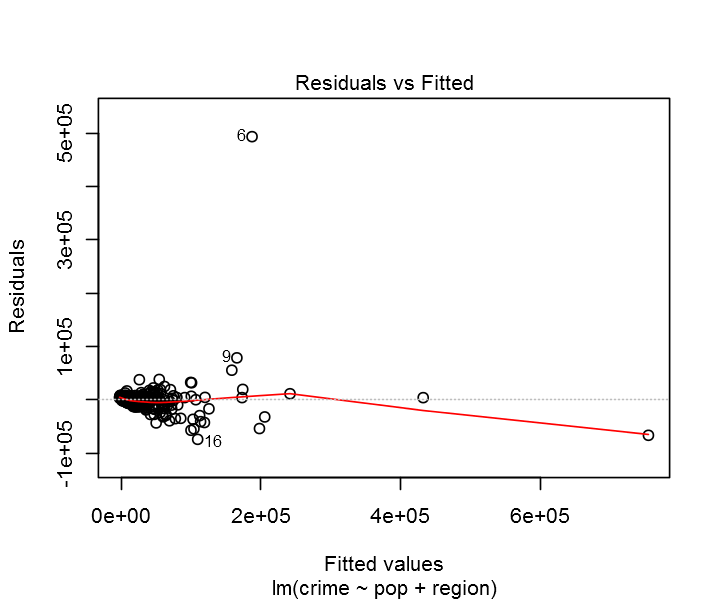

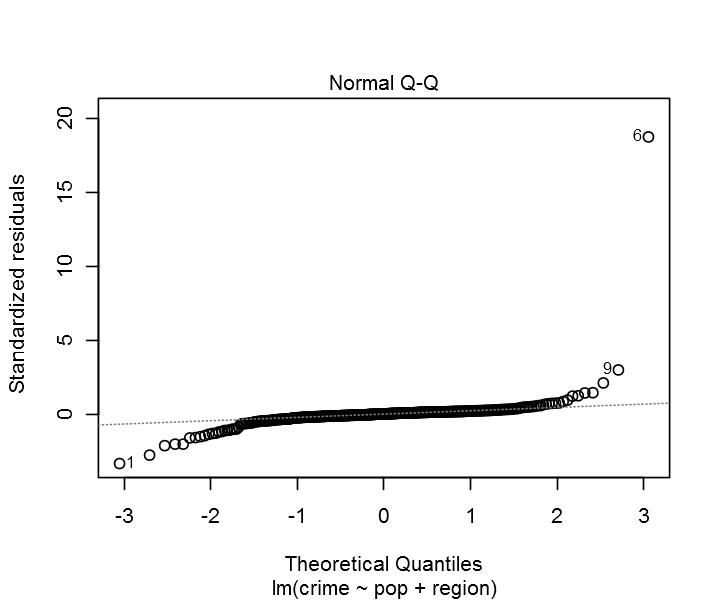

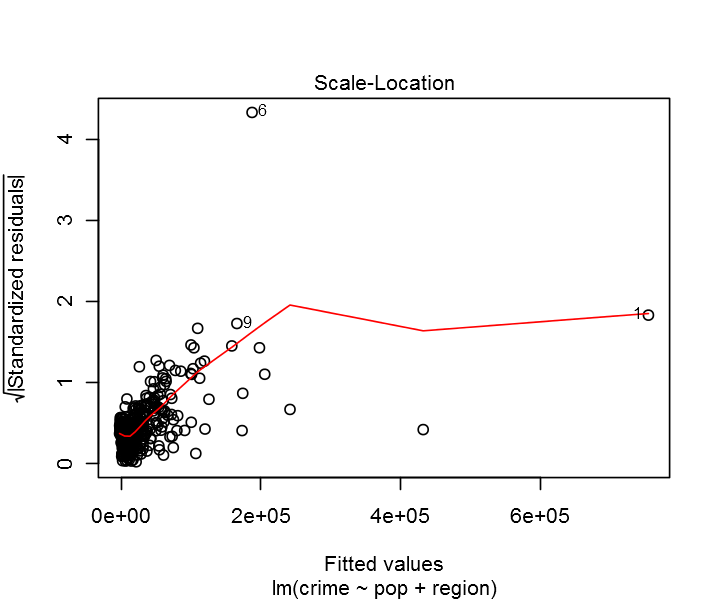

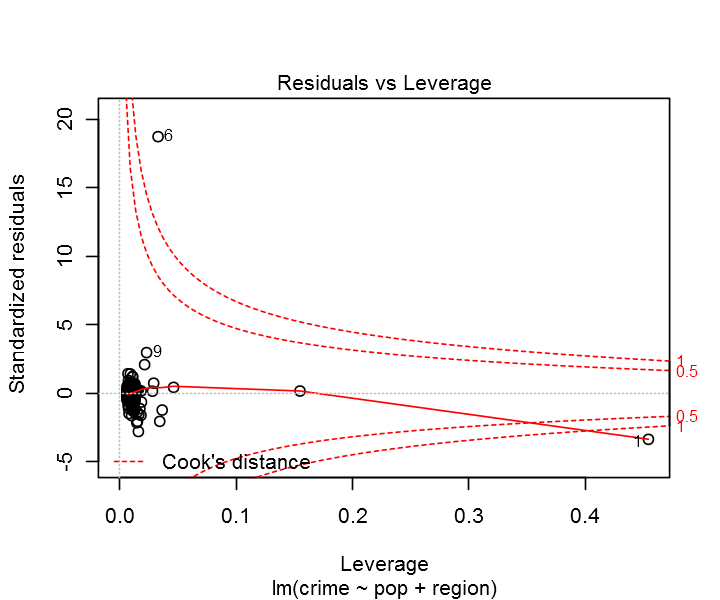

In [20]:
plot(model_cdi)

## Outlier 제거  
 - 6번이 Outlier 

In [21]:
cdi2 <- cdi[-6,]
model_cdi2 <- lm(crime ~ pop + region, data=cdi2)
summary(model_cdi2)


Call:
lm(formula = crime ~ pop + region, data = cdi2)

Residuals:
   Min     1Q Median     3Q    Max 
-62597  -4366    230   4326  88959 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.357e+04  1.221e+03 -11.111  < 2e-16 ***
pop          8.008e-02  9.561e-04  83.754  < 2e-16 ***
region2      7.626e+03  1.627e+03   4.687 3.71e-06 ***
region3      1.421e+04  1.509e+03   9.420  < 2e-16 ***
region4      7.230e+03  1.789e+03   4.040 6.31e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11780 on 434 degrees of freedom
Multiple R-squared:  0.9432,	Adjusted R-squared:  0.9427 
F-statistic:  1801 on 4 and 434 DF,  p-value: < 2.2e-16


In [22]:
anova(model_cdi2)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
pop,1.000000e+00,9.877458e+11,9.877458e+11,7.116192e+03,2.594940e-271
region,3.000000e+00,1.243004e+10,4.143347e+09,2.985065e+01,1.457945e-17
Residuals,434,60240318165,138802576,NA,NA


 - region 1일때가 평균보다 -7.267e+03 

In [23]:
model_cdi3 <- lm(crime ~ pop + region, data=cdi2, contrasts = list(region=contr.sum))
summary(model_cdi3)


Call:
lm(formula = crime ~ pop + region, data = cdi2, contrasts = list(region = contr.sum))

Residuals:
   Min     1Q Median     3Q    Max 
-62597  -4366    230   4326  88959 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -6.300e+03  6.983e+02  -9.022  < 2e-16 ***
pop          8.008e-02  9.561e-04  83.754  < 2e-16 ***
region1     -7.267e+03  1.008e+03  -7.208 2.54e-12 ***
region2      3.594e+02  9.906e+02   0.363    0.717    
region3      6.944e+03  8.930e+02   7.776 5.48e-14 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 11780 on 434 degrees of freedom
Multiple R-squared:  0.9432,	Adjusted R-squared:  0.9427 
F-statistic:  1801 on 4 and 434 DF,  p-value: < 2.2e-16


In [25]:
cdi2$fit <- model_cdi2$fitted.values

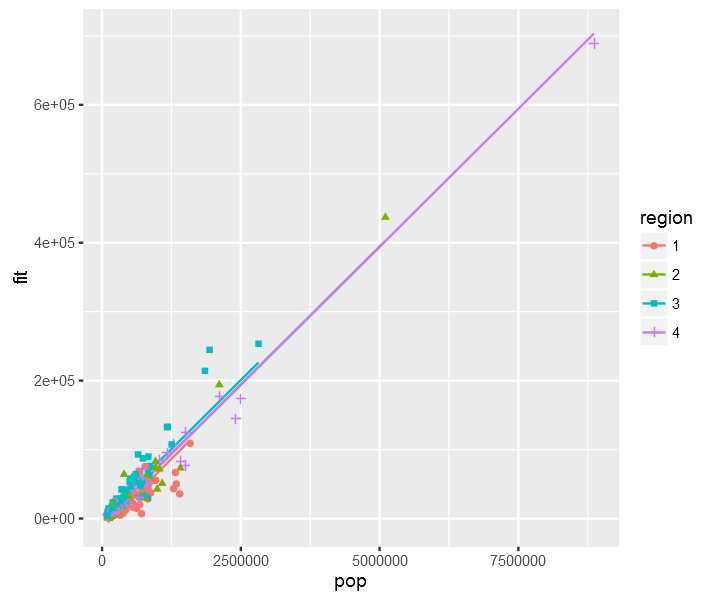

In [26]:
options(repr.plot.width=6, repr.plot.height=5)
ggplot(cdi2,aes(x=pop,y=fit,color=region)) + geom_line() + geom_point(aes(x=pop,y=crime,shape=region))

# 교호작용 
    상호 작용이라고도 한다. 사물이 서로 원인이 되거나 결과가 되기도 하며, 서로 작용하고 만나는 것으로, 역학에 있어서는 작용과 반작용, 
    생물체에 있어서는 모든 기능의 상호작용, 사회 현상에 있어서는 토대와 상부 구조(土臺와 上部構造)등이 그 두드러진 예이지만, 
    우주 내의 모든 존재는 서로 연관되며 제약(制約)하는 상호 작용 관계에 있다

<img src="photo/6.PNG">

 - p-value < 0.05 차이가 잇다. 즉, 넣는것이 좋다.

In [27]:
model_cdi4 <- lm(crime ~ pop+region+pop*region,data=cdi2)
anova(model_cdi4)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
pop,1.000000e+00,9.877458e+11,9.877458e+11,1.056455e+04,2.758808e-305
region,3.000000e+00,1.243004e+10,4.143347e+09,4.431563e+01,5.589664e-25
pop:region,3.000000e+00,1.994342e+10,6.647807e+09,7.110237e+01,2.250237e-37
Residuals,431,40296896597,93496280,NA,NA
